# Read data
Our data set is stored at **/data7/users/deandres/newML2** . It contains X-ray , Sunyaev–Zeldovich, Optical (Stars) and DM maps. The objective of this notebook is to show how to read the data and efficiently save it  for further preprocessing.

In [3]:
path = "/data7/users/deandres/newML2/"

In [4]:
RAs = np.arange(0,29)
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from utils import plot_cluster

def read_xr(lp,hid,RA):
    region = 'X-ray/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-Athena-wfi-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_sz(lp,hid,RA):
    region = 'SZ/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-TT-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

def read_dm(lp,hid,RA):
    region = 'DM/NewMDCLUSTER_{}/'.format(str(lp).zfill(4))
    s = str(hid)[:3]
    file = 'snap_{}-DM-cl-{}-ra-{}.fits'.format(s,hid,RA)
    print(RA)
    data = fits.getdata(path+region+file)
    return data

In [5]:
lp = 1
hid = 123000000000001

In [6]:
RAs = np.arange(29)

0
0
0


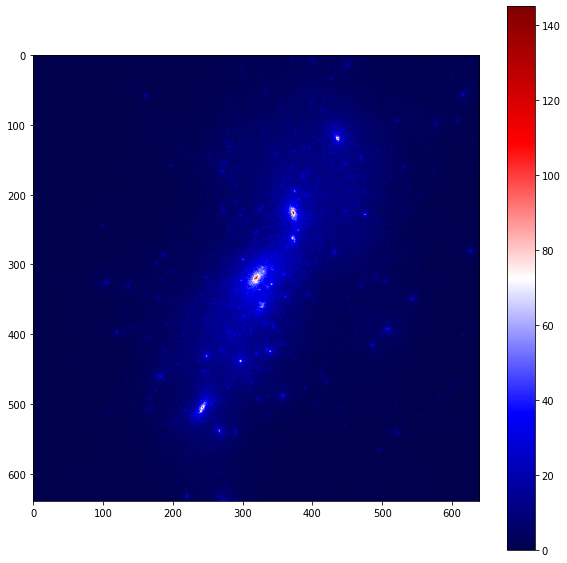

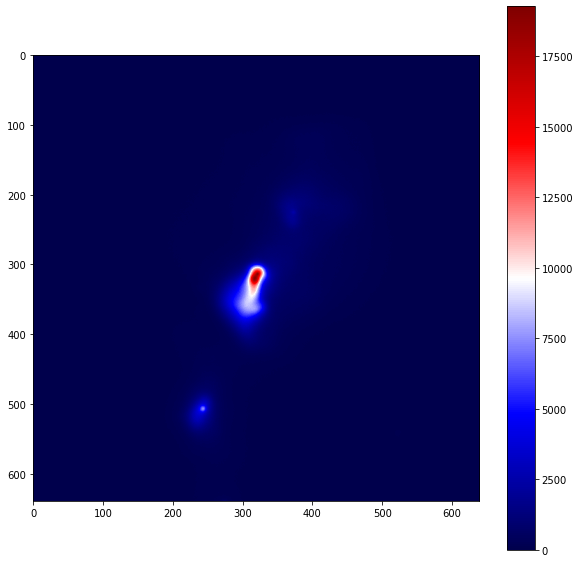

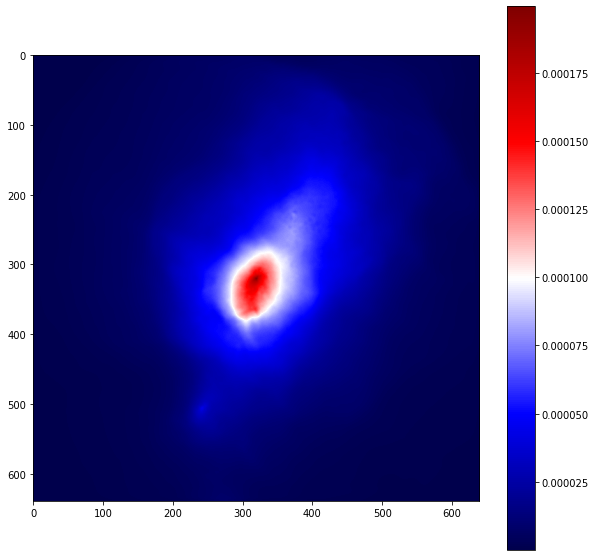

1
1
1


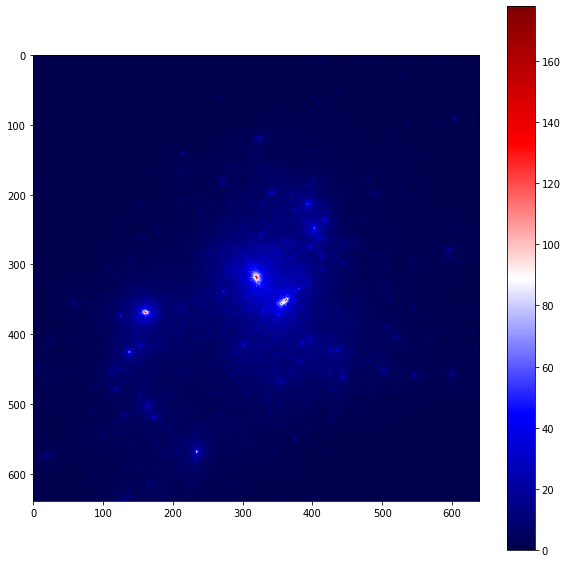

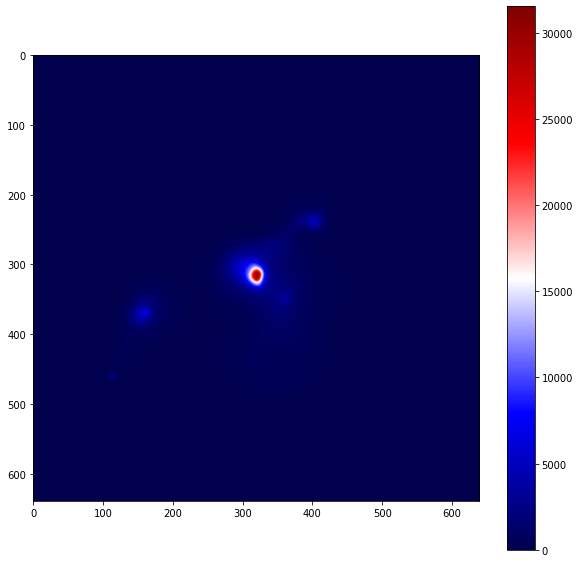

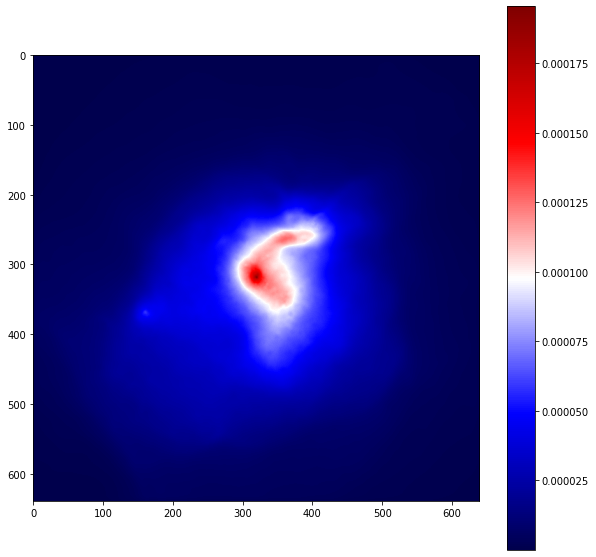

2
2
2


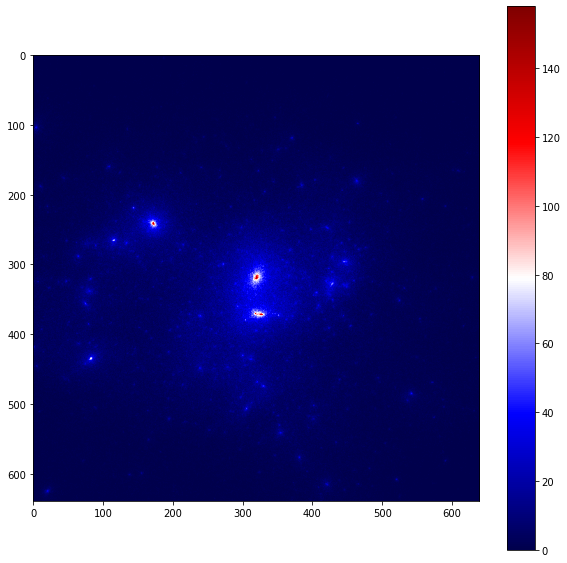

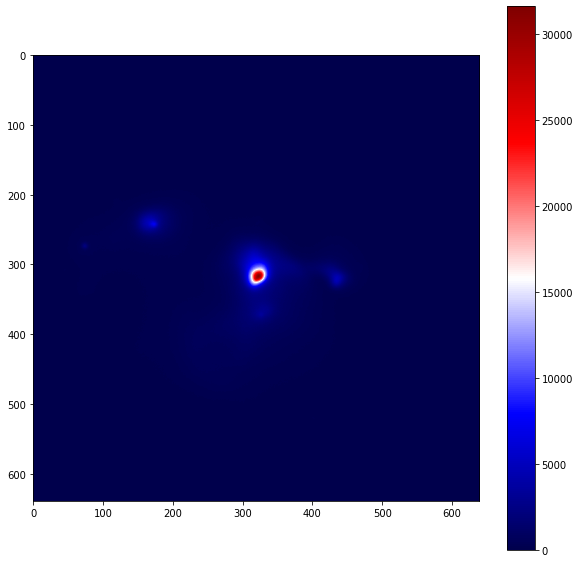

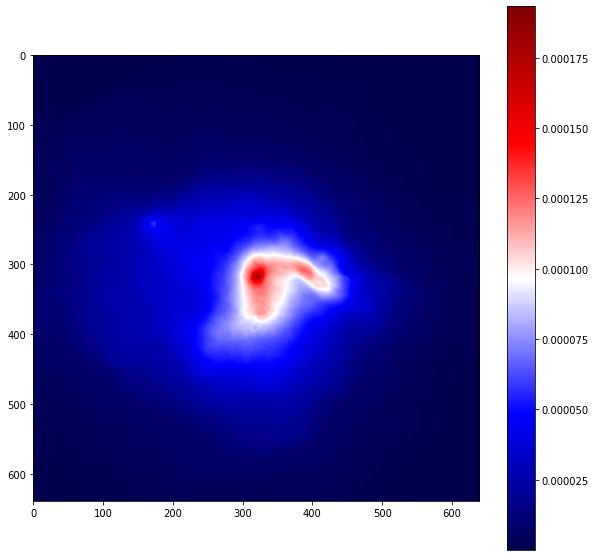

3
3
3


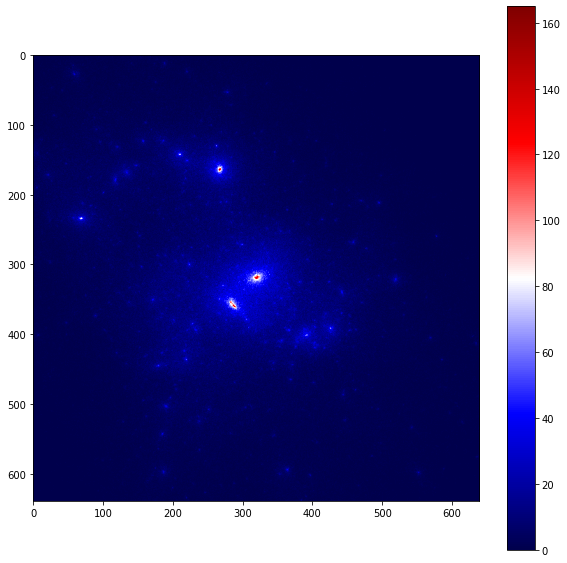

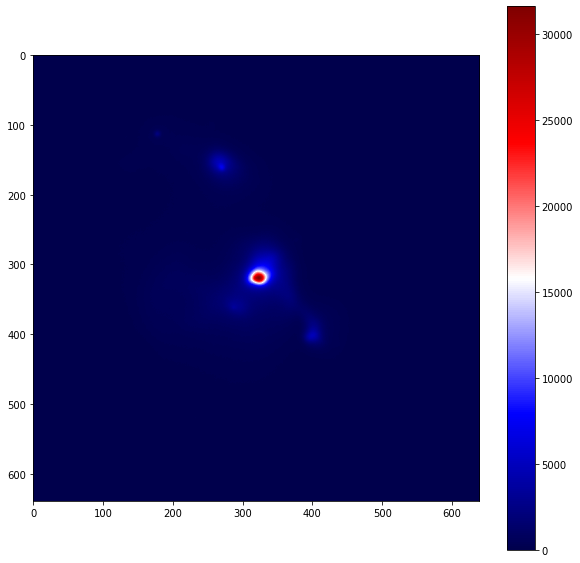

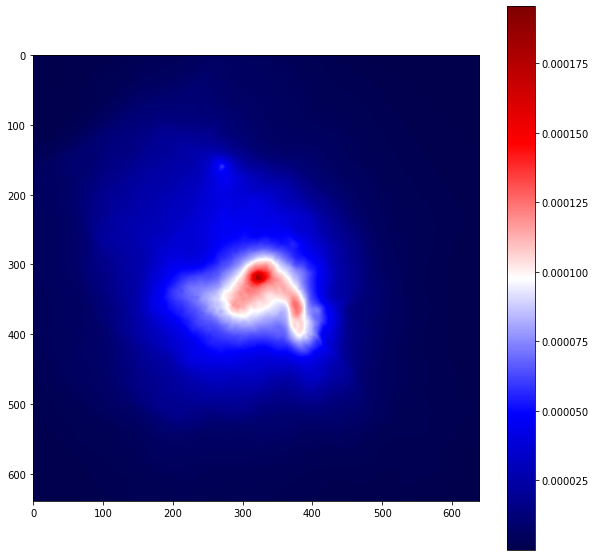

4
4
4


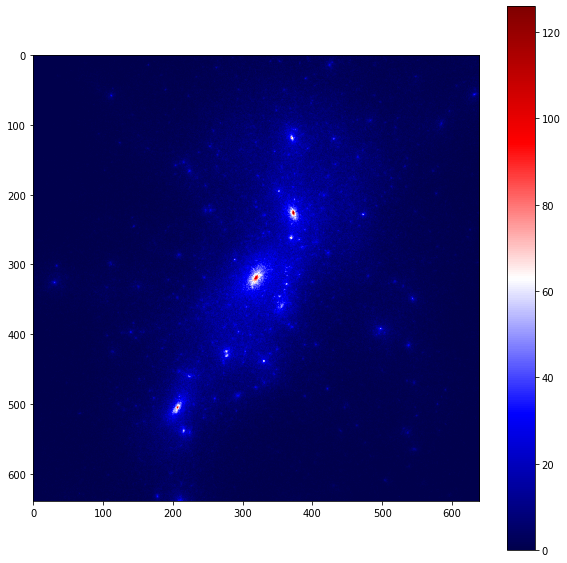

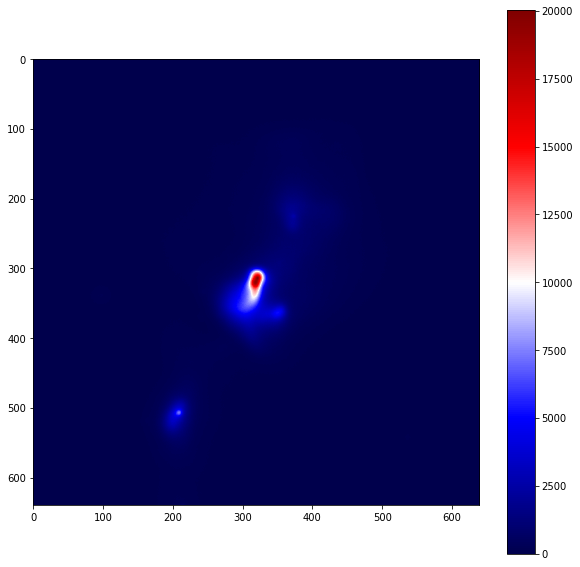

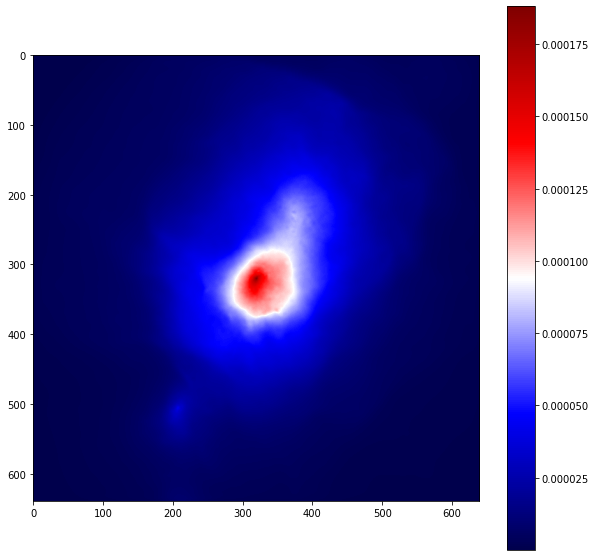

5
5
5


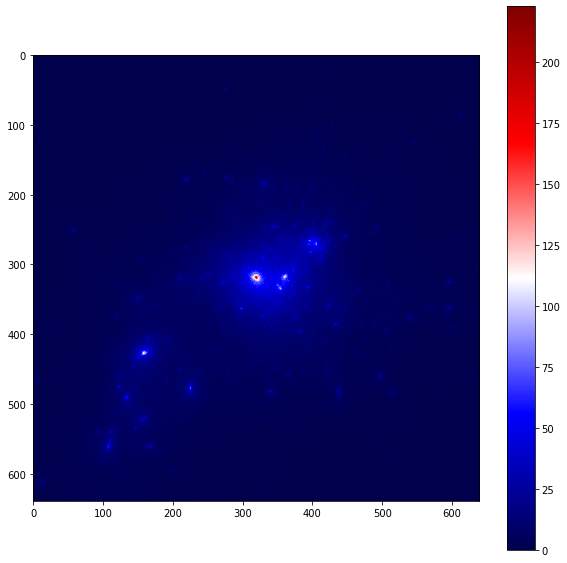

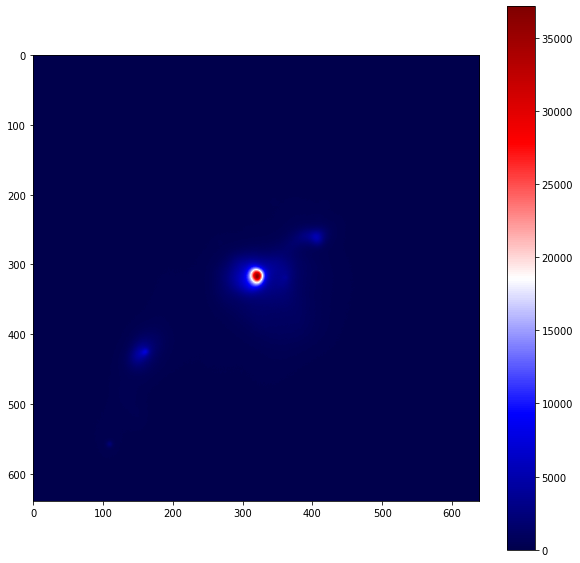

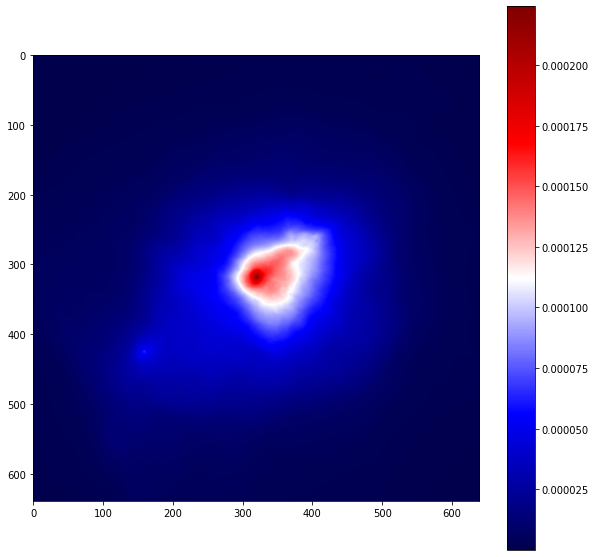

6
6
6


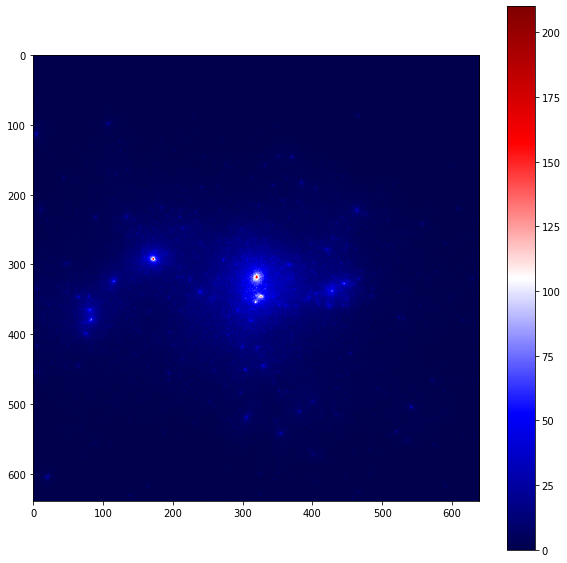

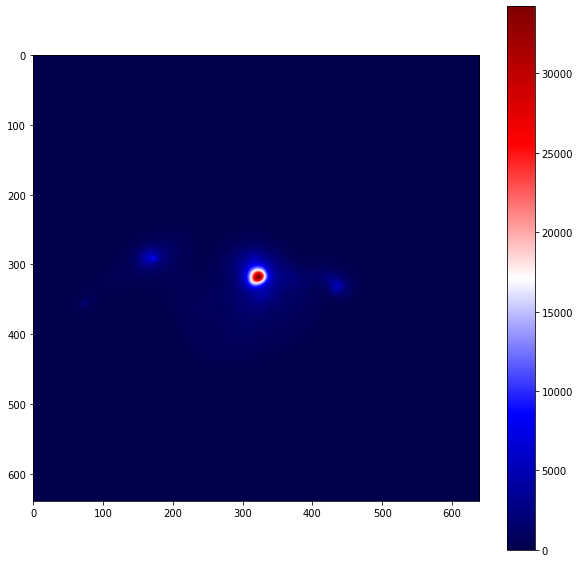

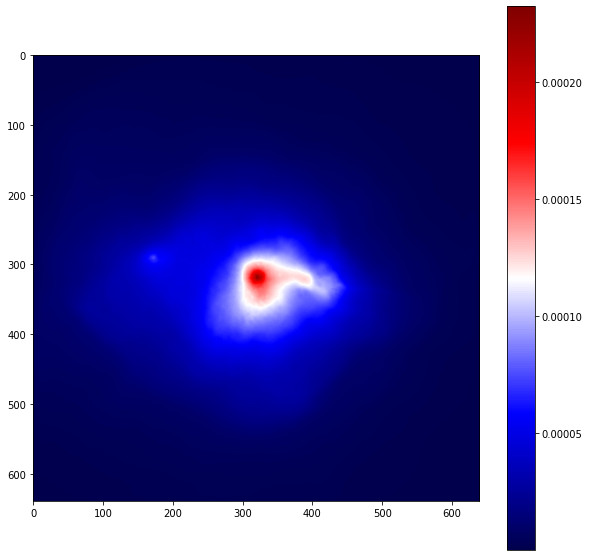

7
7
7


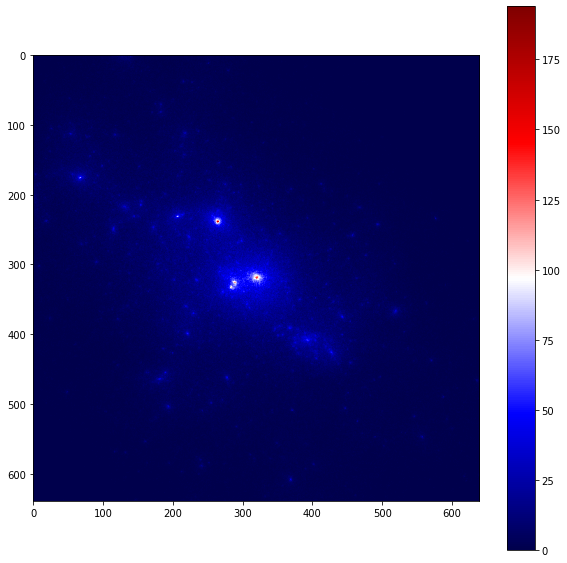

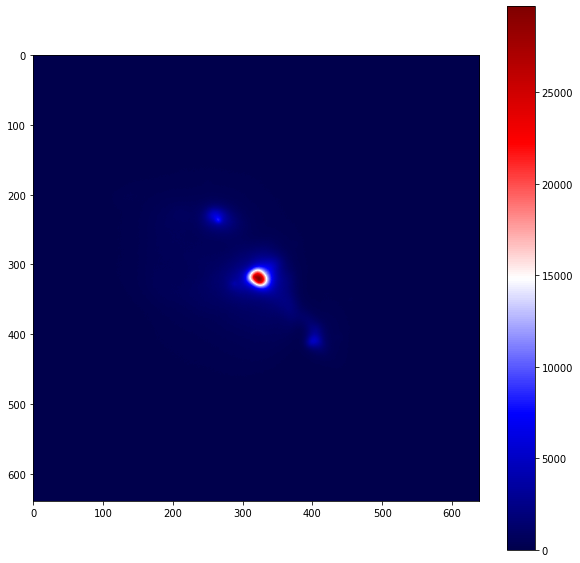

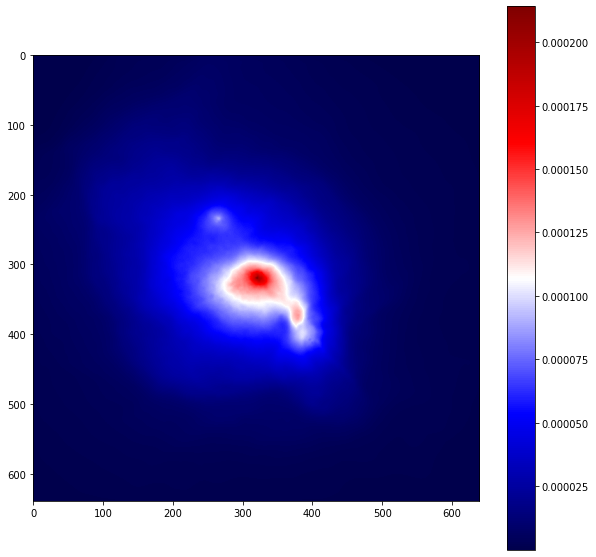

8
8
8


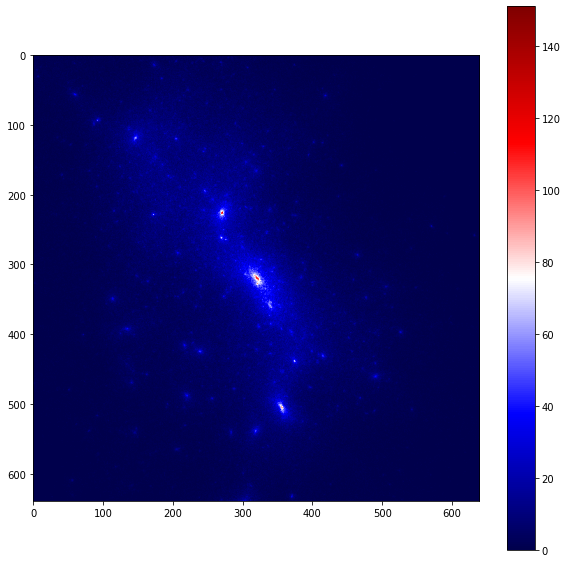

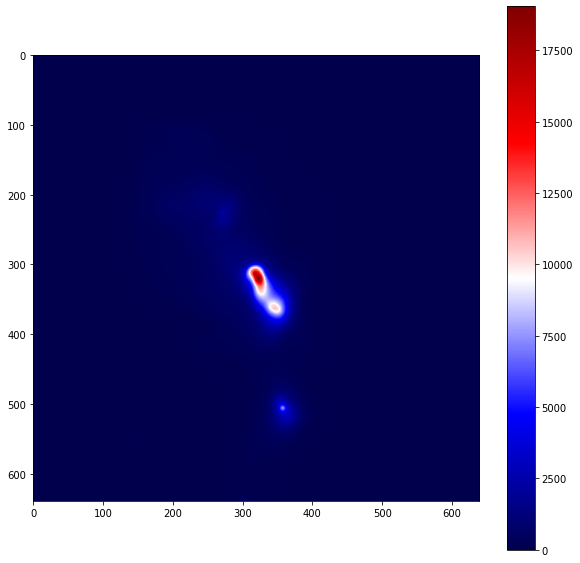

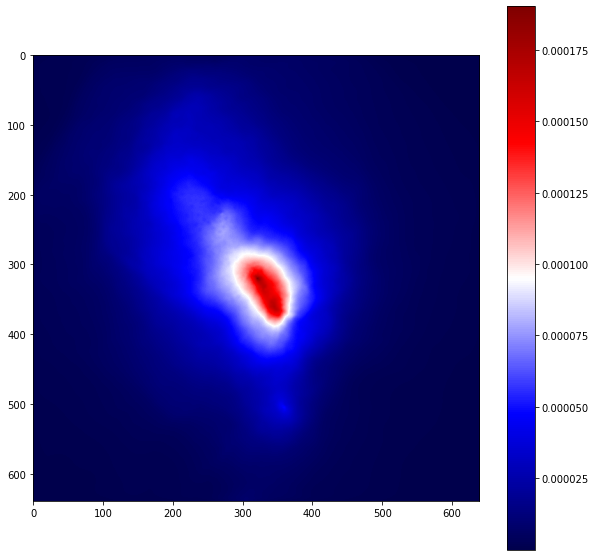

9
9
9


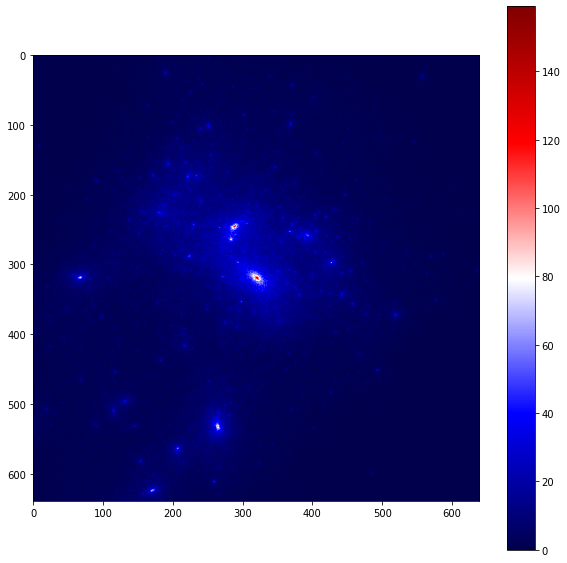

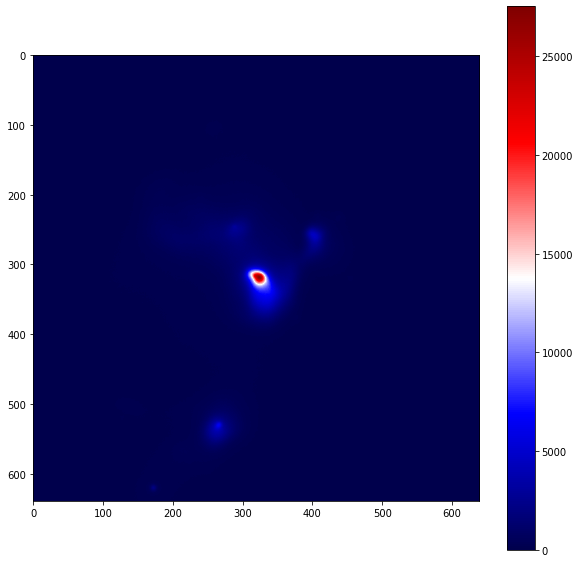

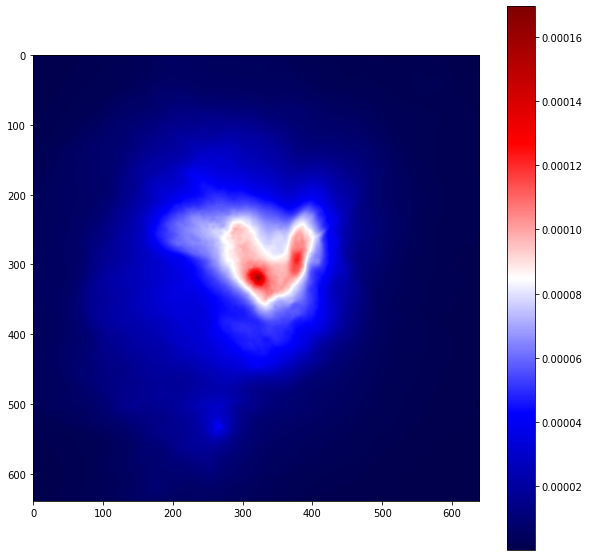

10
10
10


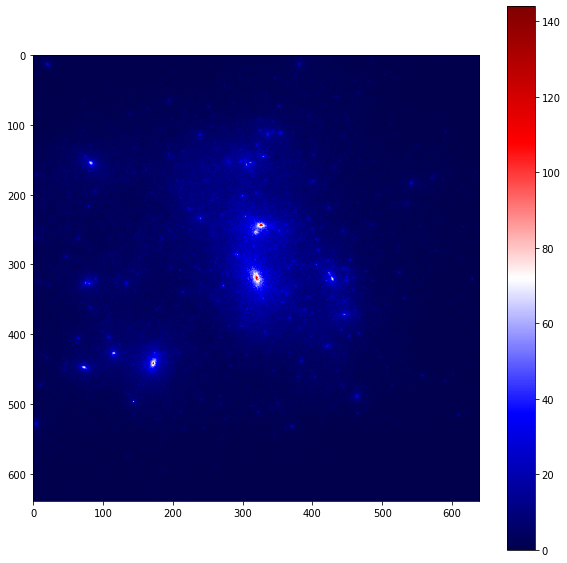

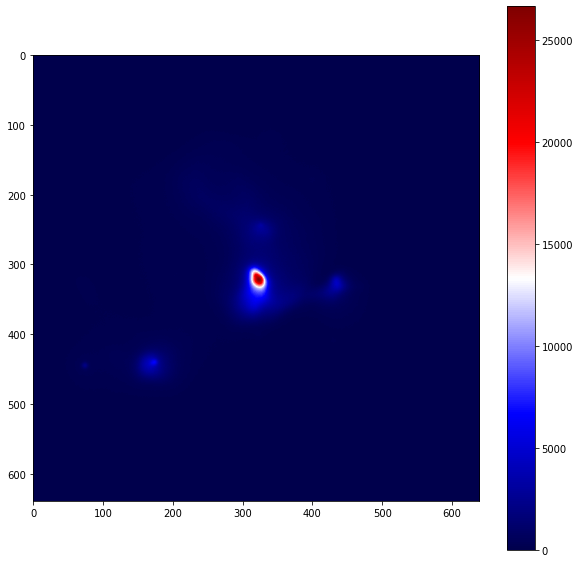

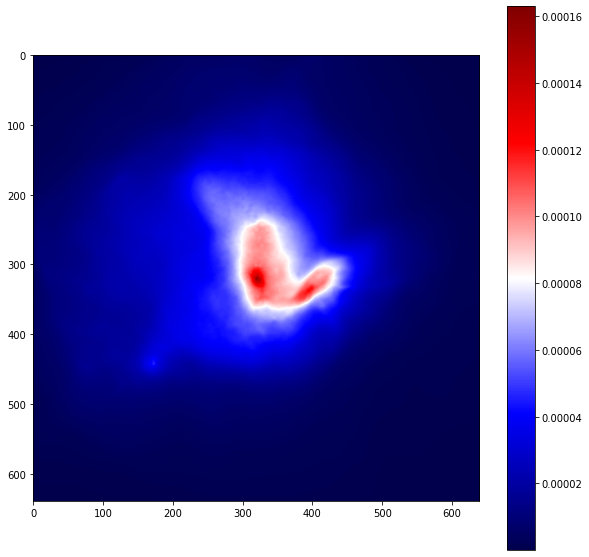

11
11
11


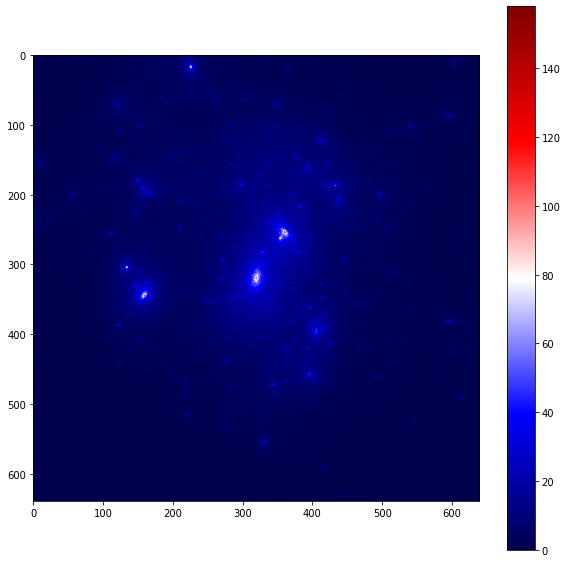

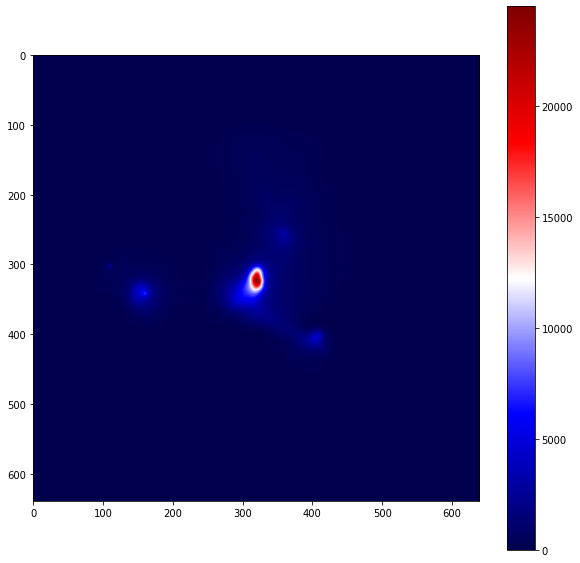

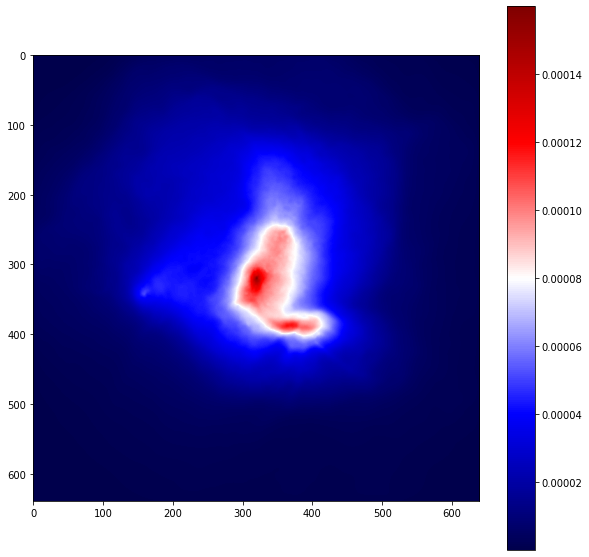

12
12
12


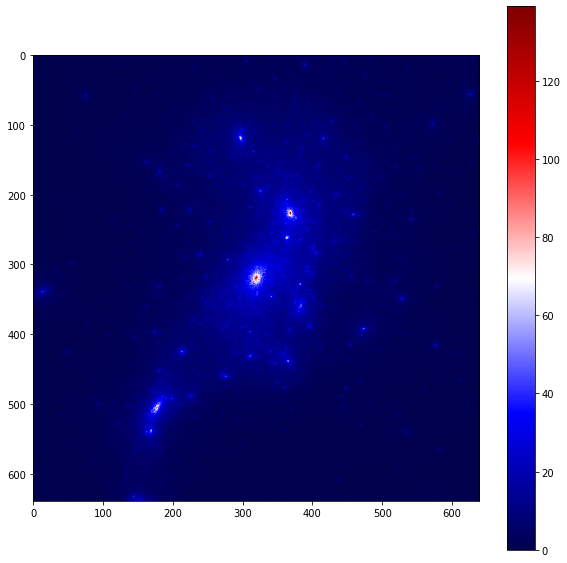

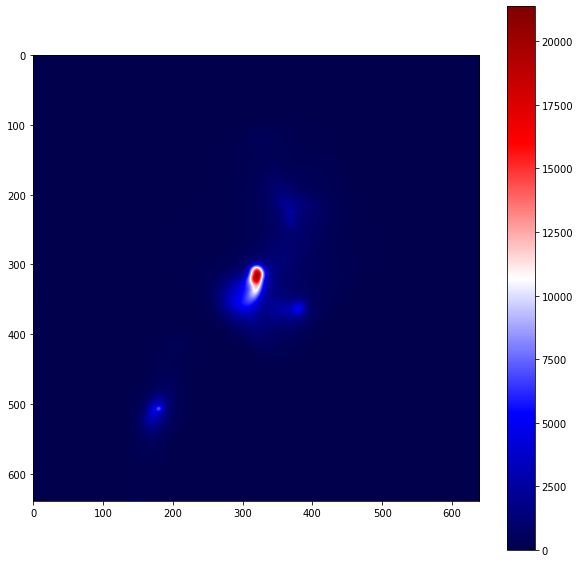

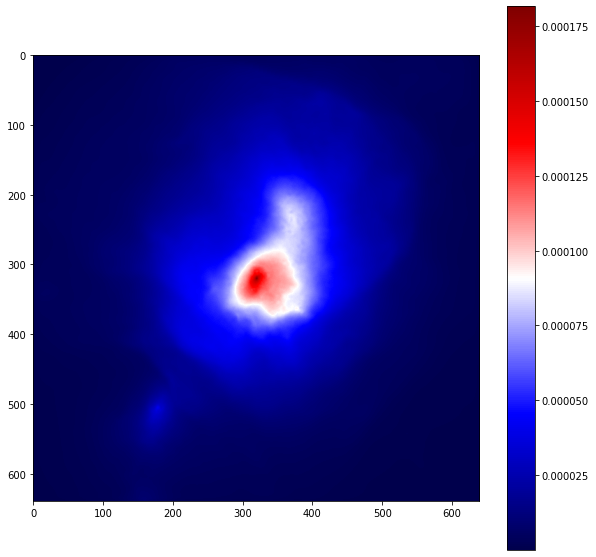

13
13
13


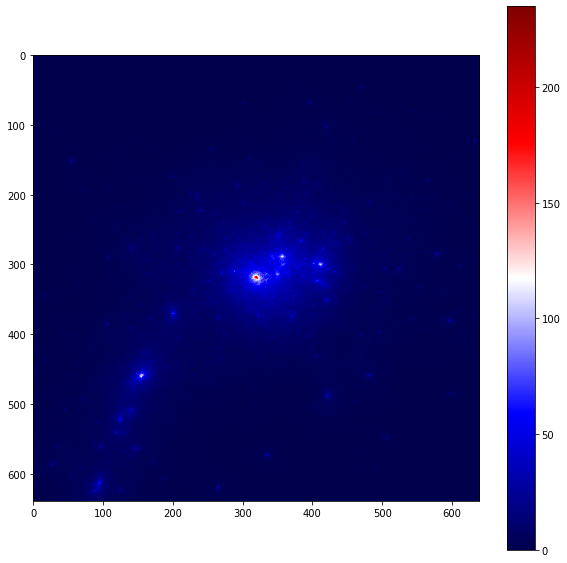

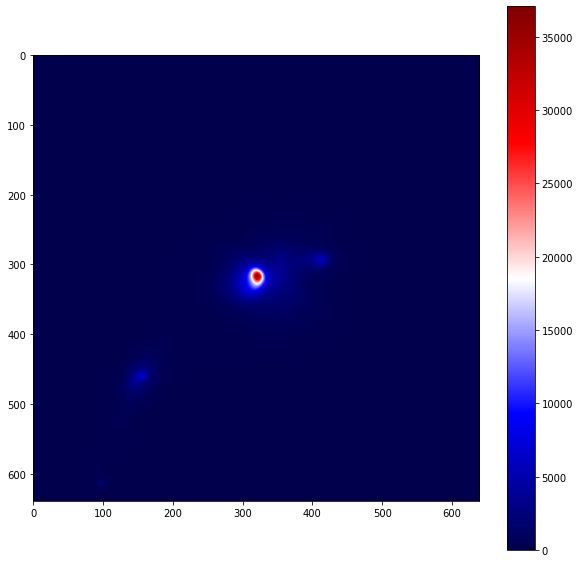

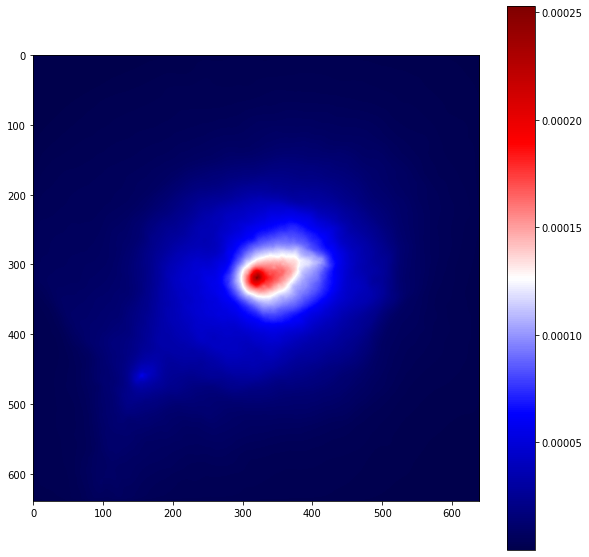

14
14
14


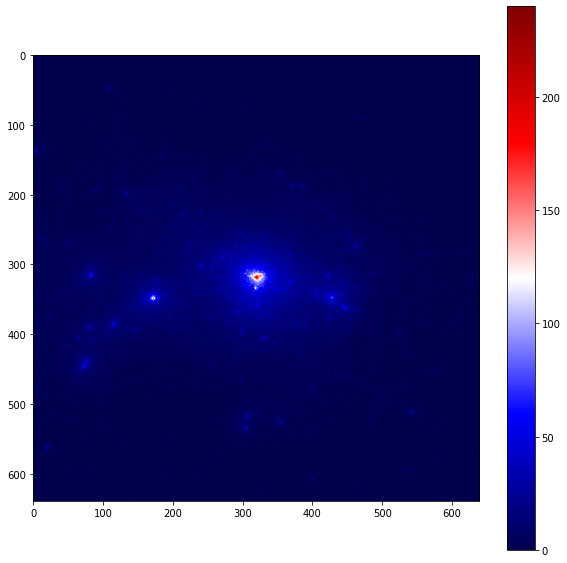

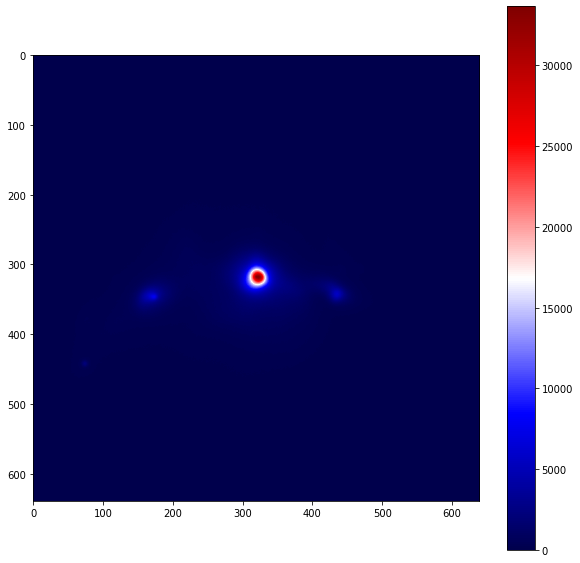

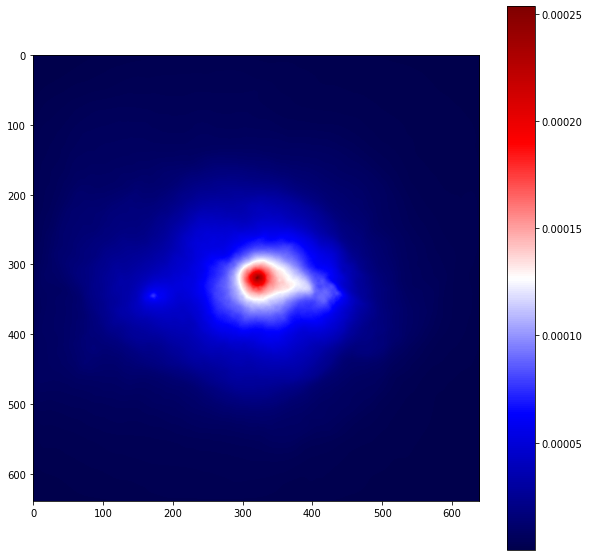

15
15
15


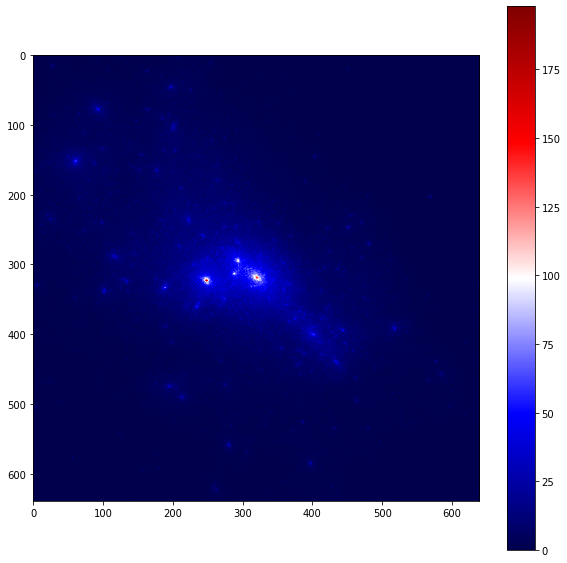

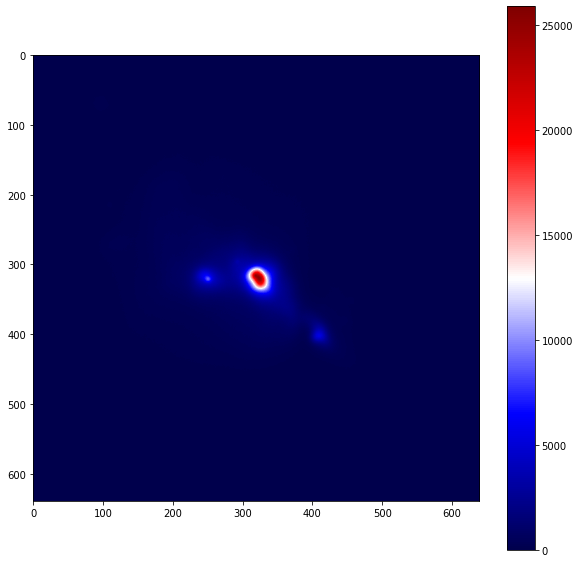

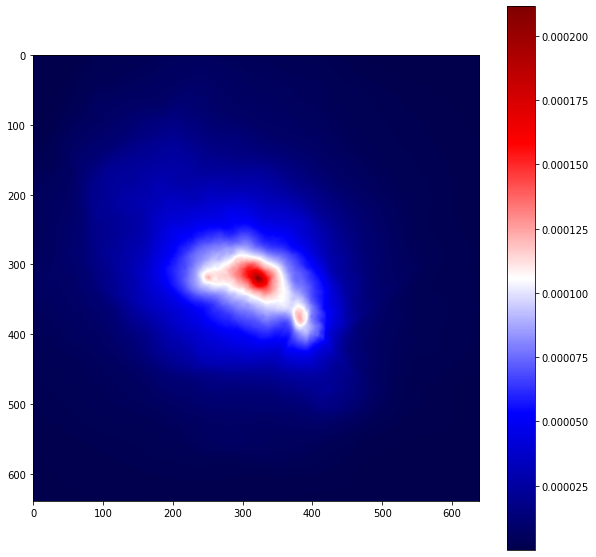

16
16
16


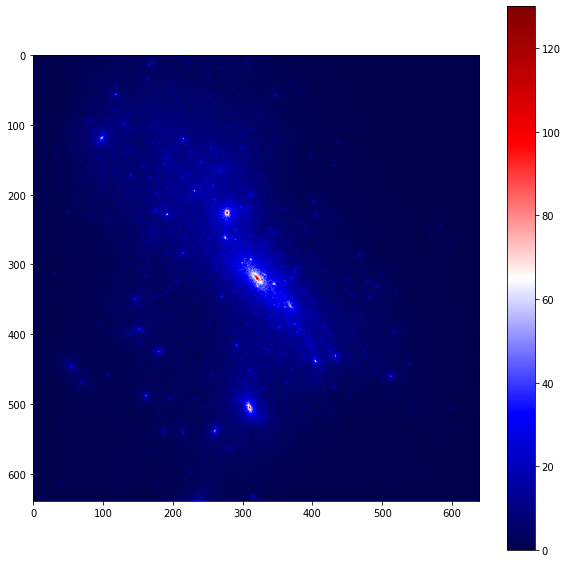

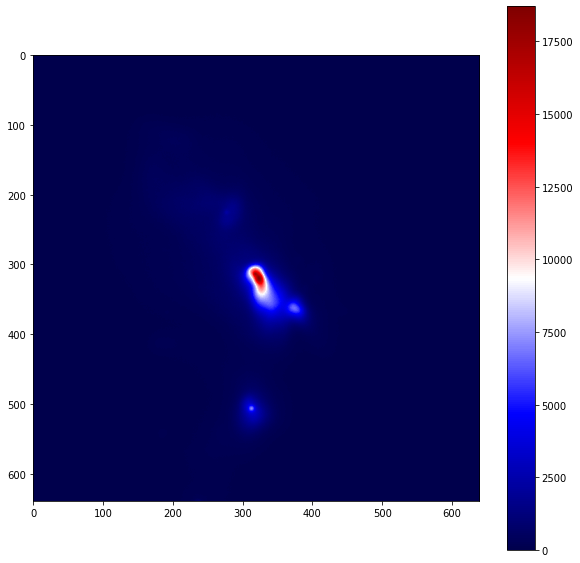

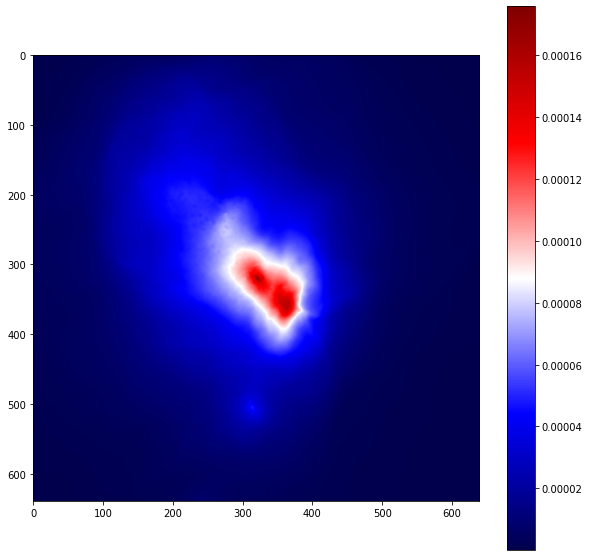

17
17
17


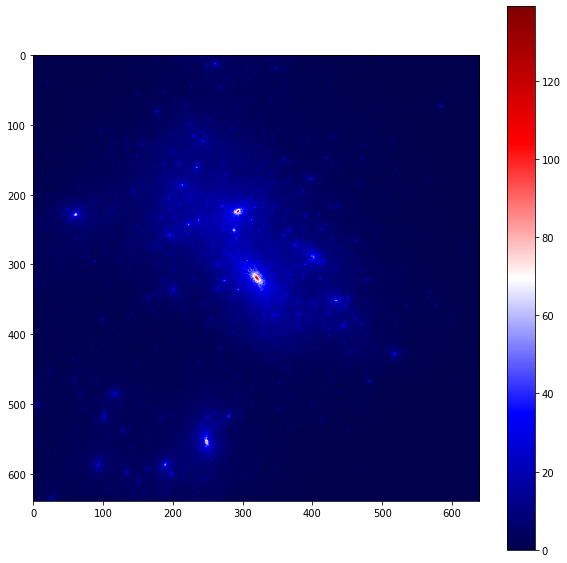

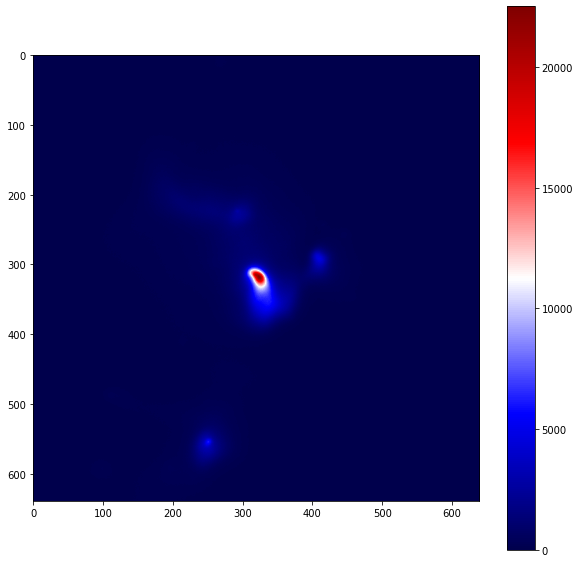

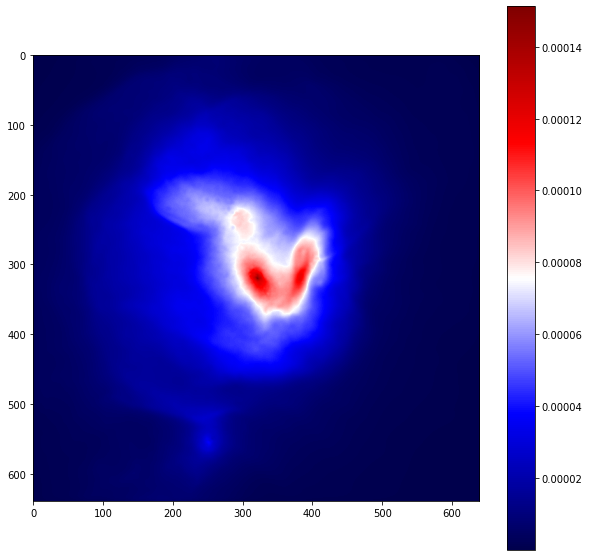

18
18
18


FileNotFoundError: [Errno 2] No such file or directory: '/data7/users/deandres/newML2/SZ/NewMDCLUSTER_0001/snap_123-TT-cl-123000000000001-ra-18.fits'

In [30]:
for RA in RAs:
    dm = read_dm(lp,hid,RA)
    Xray = read_xr(lp,hid,RA)
    SZ = read_sz(lp,hid,RA)
    plot_cluster(dm)
    plot_cluster(Xray)
    plot_cluster(SZ)

In [18]:
### how many haloes there are?
from os import walk
import numpy as np

f = []
regionID =[] 
cluster = '/NewMDCLUSTER_{}'
for i in range(1,325):
    mypath=path+"DM/"+cluster.format(str(i).zfill(4))

    #print(mypath)
    for (dirpath, dirnames, filenames) in walk(mypath):
        f.extend(sorted(filenames))
        regionID.append(i*np.ones(len(filenames)))
        break

n_maps = len(f)
n_clusters = n_maps/29

print('there are',n_maps,'maps')
print('there are',n_clusters,' clusters')


there are 67449 maps
there are 2325.8275862068967  clusters


In [24]:
(67449+(65-32)*29)/29

2358.8275862068967